In [7]:
import umap
import umap.plot
import pickle
import numpy as np
import matplotlib.pyplot as plt
from dotenv import dotenv_values

config = dotenv_values(".env")

data_directory = config["DATA_DIR"]

print("Loading data...")
data = np.load(f'{data_directory}/data.npy')
print("Loaded data of shape {}".format(data.shape))

Loading data...
Loaded data of shape (262144, 60)


In [2]:
print("Embedding into two dimensions using umap...")
embedding = umap.UMAP().fit(data)
print("Embedding complete.")

Embedding into two dimensions using umap...
Embedding complete.


In [3]:
# The reshape here has to be modified depending on the step count and dthresh used
# For static initial conditions, just resize to (1, step_count)
# This only affects the color of the resulting scatterplot. We apply a color scheme
# based on the average rate of entropy change for that rule over the time it was
# simulated and averaged out.

average_diffs = np.array([np.diff(x.reshape((1, 60)), axis=1).mean() for x in data])

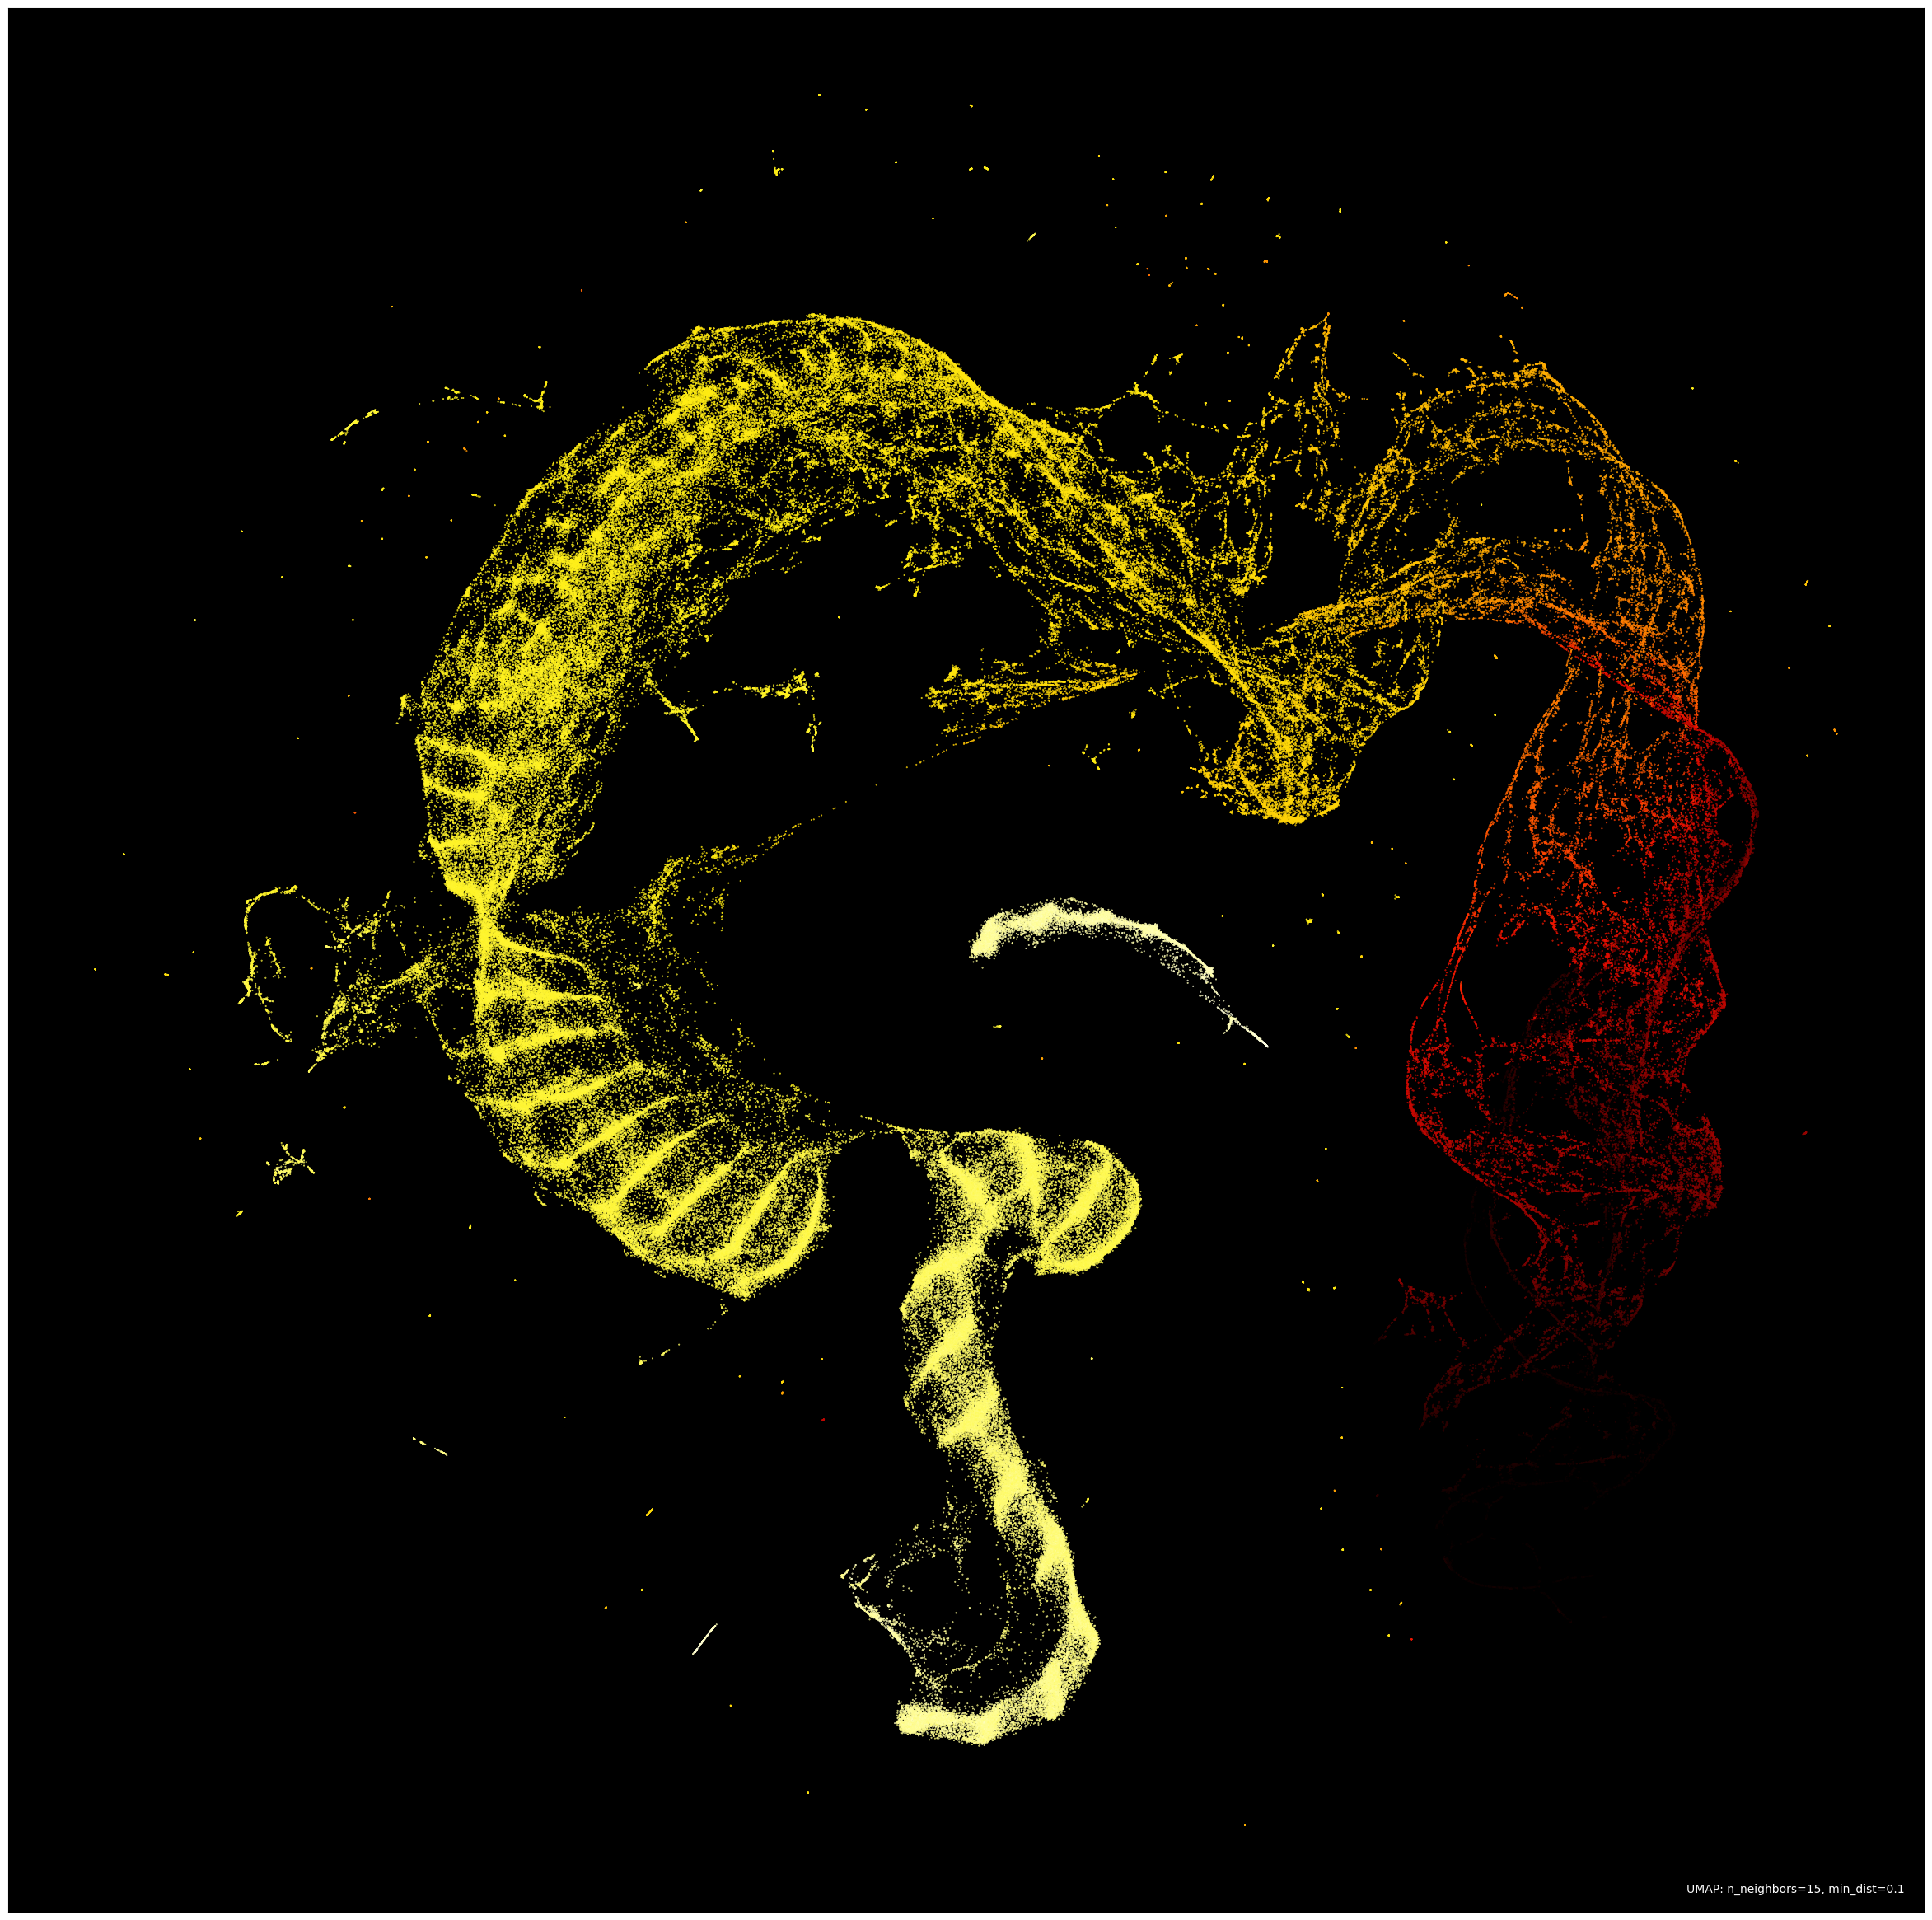

In [26]:
umap.plot.points(
     embedding,
     values=average_diffs,
     theme='fire',
     width=3000,
     height=3000,
)
plt.savefig(f"{data_directory}/umap_plot.png", bbox_inches='tight')

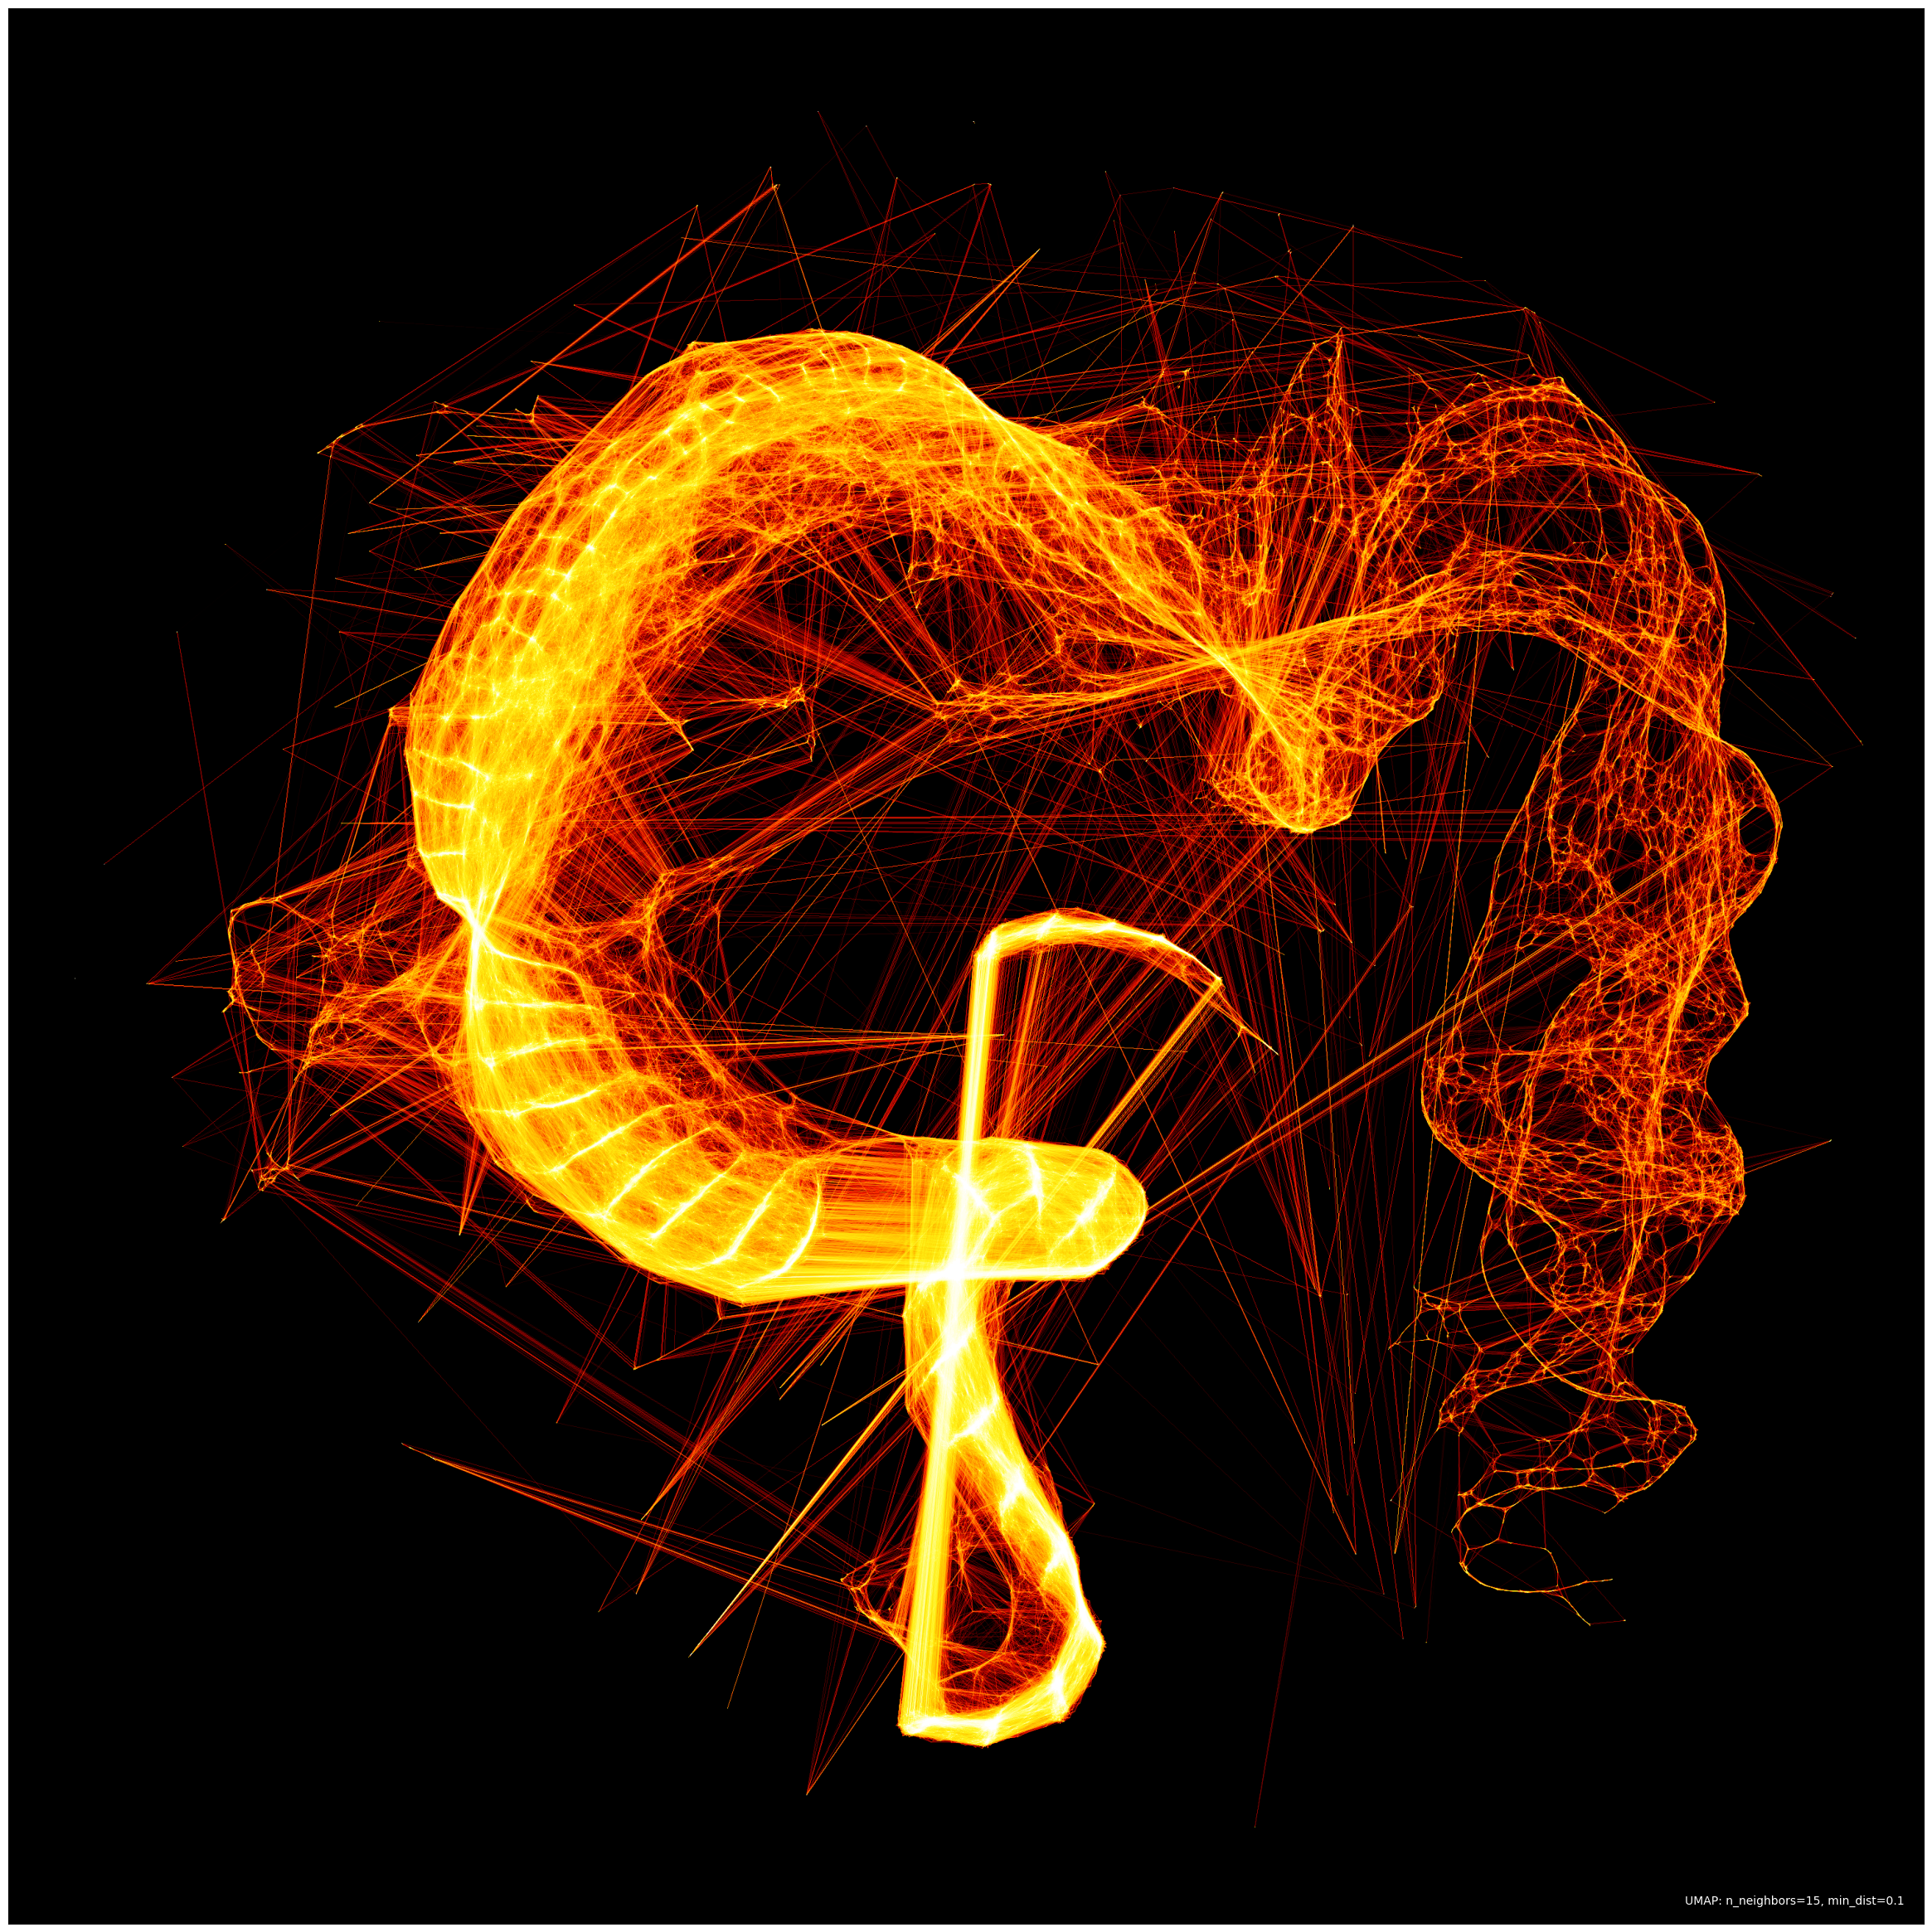

In [30]:
umap.plot.connectivity(
     embedding,
     values=average_diffs,
     theme='fire',
     width=3000,
     height=3000,
)
plt.savefig(f"{data_directory}/umap_connectivity_plot.png", bbox_inches='tight')

In [31]:
np.save(f"{data_directory}/embedding.npy", embedding.embedding_)
np.save(f"{data_directory}/average_diffs.npy", average_diffs)

In [32]:
import plotly.graph_objs as go
from sklearn.decomposition import PCA

# Perform PCA on the dataset
pca = PCA(n_components=5)  # We calculate at least 3 components to make sure components_ is populated
pca.fit(data)

def show_component(n, name):
    # Get the first principal component
    first_pc = pca.components_[n]

    # Reshape this first principal component into the 6x60 2D structure
    first_pc_reshaped = first_pc.reshape((6, 50))

    # Prepare data for 3D surface plot using plotly
    x = np.arange(60)
    y = np.arange(5)
    X, Y = np.meshgrid(x, y)
    Z = first_pc_reshaped

    # Plotly 3D Surface plot
    fig = go.Figure(data=[go.Surface(z=Z)])
    fig.update_layout(
        title=name+' Principal Component',
        width=700,
        height=700,
        margin=dict(l=65, r=50, b=65, t=90)
    )
    fig.show()

In [19]:
show_component(0, 'First')

ValueError: cannot reshape array of size 60 into shape (6,50)

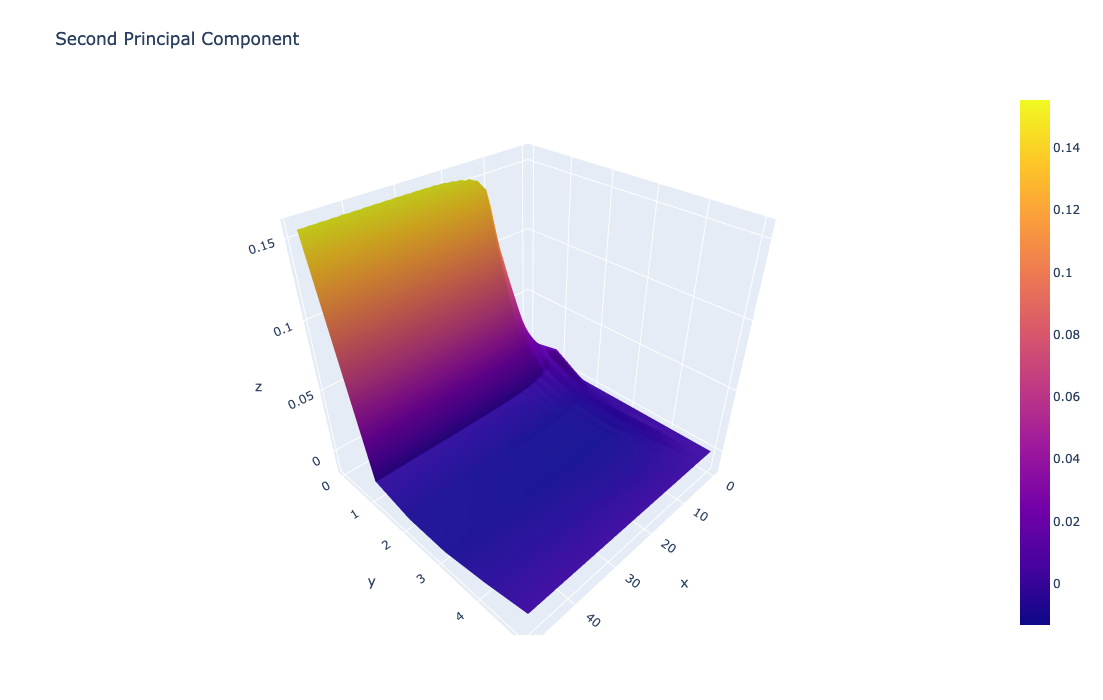

In [87]:
show_component(1, 'Second')

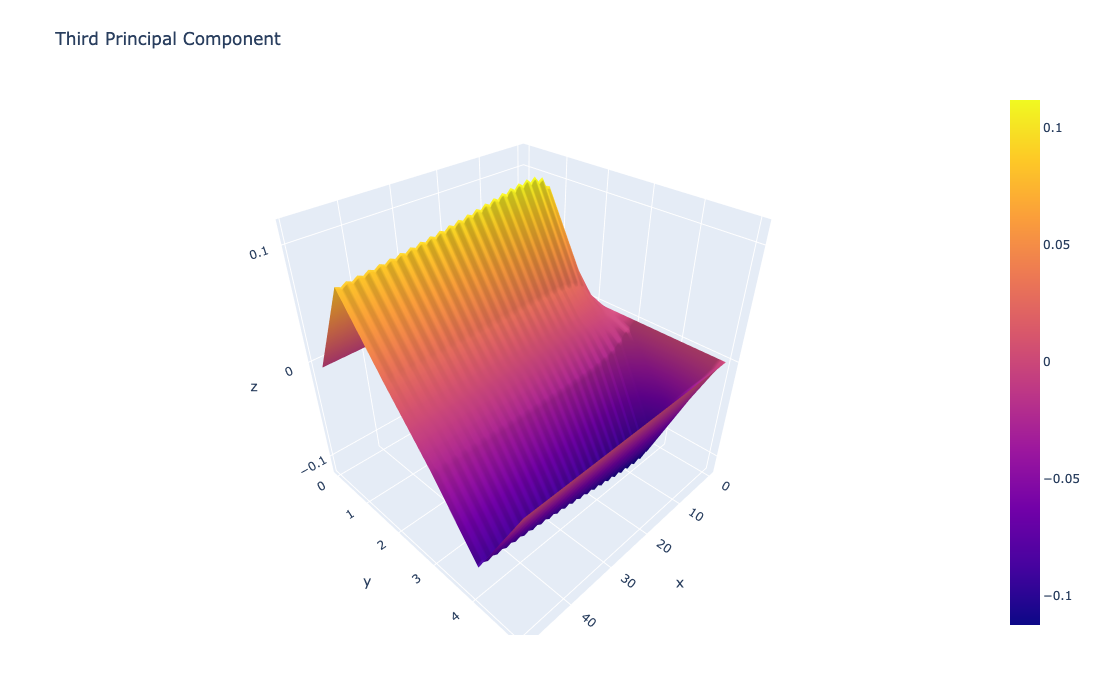

In [88]:
show_component(2, 'Third')

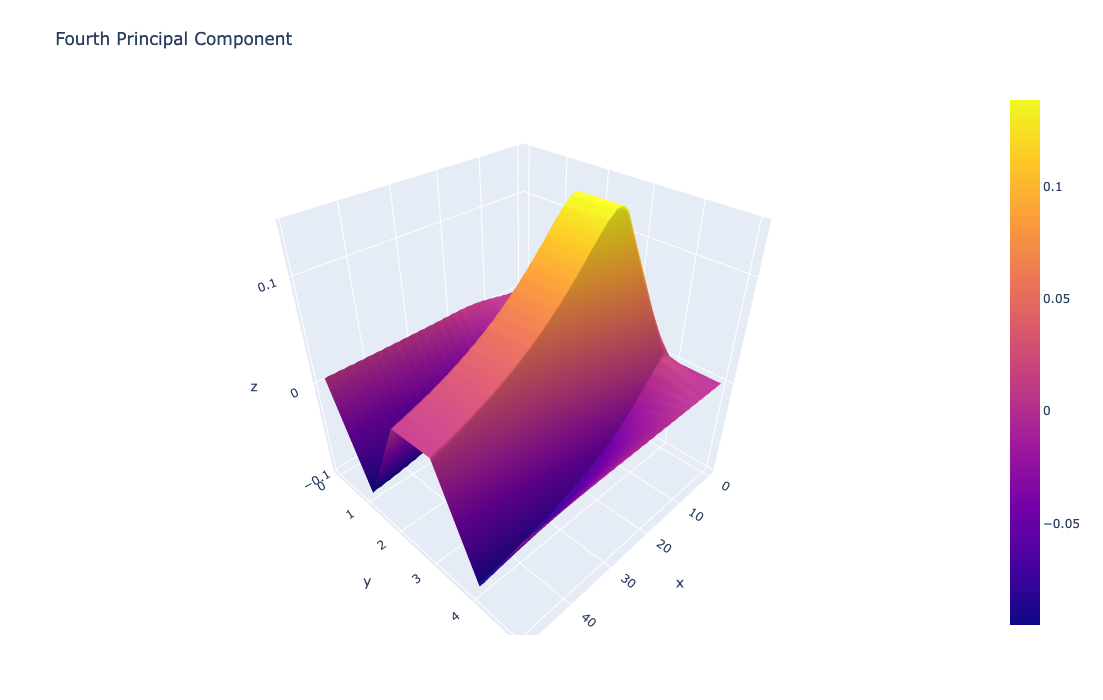

In [89]:
show_component(3, 'Fourth')

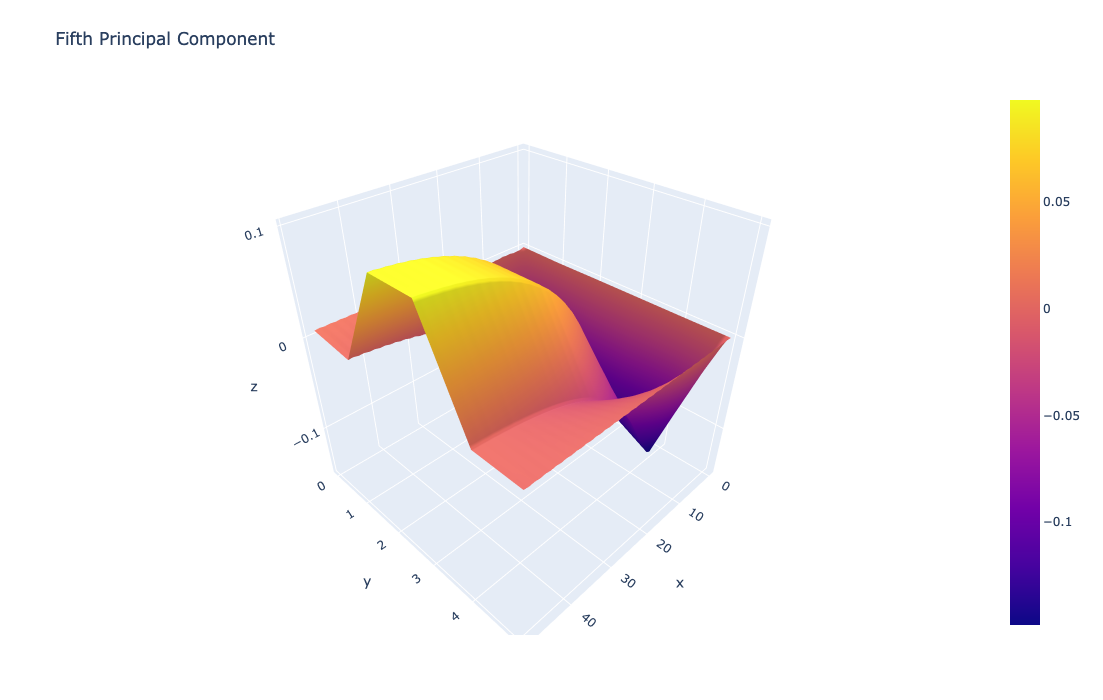

In [90]:
show_component(4, 'Fifth')